1.Import the libraries

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from sklearn import metrics 
  
import warnings 
warnings.filterwarnings('ignore')

2.Loading the Training Dataset

In [20]:
df=pd.read_csv("TVSMOTOR.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-10,959.950012,969.000000,950.099976,966.599976,961.854065,1247420
1,2022-08-11,971.000000,974.900024,955.099976,958.250000,953.545044,1035579
2,2022-08-12,960.000000,964.500000,950.950012,952.549988,947.873047,653263
3,2022-08-16,958.000000,981.700012,949.549988,979.099976,974.292664,965828
4,2022-08-17,981.000000,986.000000,968.250000,970.549988,965.784668,1182141


3.Using the Open Stock Price Column to Train your Model.

In [21]:
training_set=df.iloc[:,1:2].values
print(training_set)
print(training_set.shape)


[[ 959.950012]
 [ 971.      ]
 [ 960.      ]
 [ 958.      ]
 [ 981.      ]
 [ 971.      ]
 [ 981.400024]
 [ 953.      ]
 [ 930.      ]
 [ 959.      ]
 [ 964.950012]
 [ 958.799988]
 [ 935.      ]
 [ 964.      ]
 [ 983.900024]
 [1022.      ]
 [1025.849976]
 [1042.849976]
 [1048.      ]
 [1048.849976]
 [1056.      ]
 [1059.050049]
 [1052.550049]
 [1031.      ]
 [1041.800049]
 [1040.      ]
 [1019.5     ]
 [1033.5     ]
 [1076.      ]
 [1060.      ]
 [1068.      ]
 [1034.800049]
 [1035.      ]
 [1024.25    ]
 [1026.349976]
 [1011.      ]
 [1035.150024]
 [1016.599976]
 [1039.75    ]
 [1080.      ]
 [1066.400024]
 [1070.      ]
 [1050.400024]
 [1087.699951]
 [1091.      ]
 [1071.      ]
 [1092.      ]
 [1135.      ]
 [1156.25    ]
 [1148.      ]
 [1154.900024]
 [1150.099976]
 [1159.900024]
 [1120.      ]
 [1132.800049]
 [1150.      ]
 [1140.449951]
 [1111.650024]
 [1137.      ]
 [1115.      ]
 [1120.099976]
 [1144.699951]
 [1138.      ]
 [1109.949951]
 [1103.      ]
 [1105.699951]
 [1118.699

4.Normalising the Dataset

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)

scaled_training_set

array([[0.06468685],
       [0.08855292],
       [0.06479482],
       [0.06047516],
       [0.11015119],
       [0.08855292],
       [0.11101517],
       [0.04967603],
       [0.        ],
       [0.06263499],
       [0.07548599],
       [0.062203  ],
       [0.01079914],
       [0.07343413],
       [0.11641474],
       [0.1987041 ],
       [0.20701939],
       [0.24373645],
       [0.25485961],
       [0.25669541],
       [0.27213823],
       [0.27872581],
       [0.26468693],
       [0.21814255],
       [0.24146879],
       [0.23758099],
       [0.19330454],
       [0.22354212],
       [0.31533477],
       [0.28077754],
       [0.29805616],
       [0.22635   ],
       [0.22678186],
       [0.20356371],
       [0.2080993 ],
       [0.174946  ],
       [0.22710588],
       [0.18704098],
       [0.23704104],
       [0.32397408],
       [0.29460048],
       [0.30237581],
       [0.26004325],
       [0.34060465],
       [0.34773218],
       [0.30453564],
       [0.34989201],
       [0.442

5.Creating X_train and y_train Data structures

In [23]:
X_train=[]
y_train=[]
for i in range(10,247):
    X_train.append(scaled_training_set[i-10:i,0])
    y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(237, 10)
(237,)


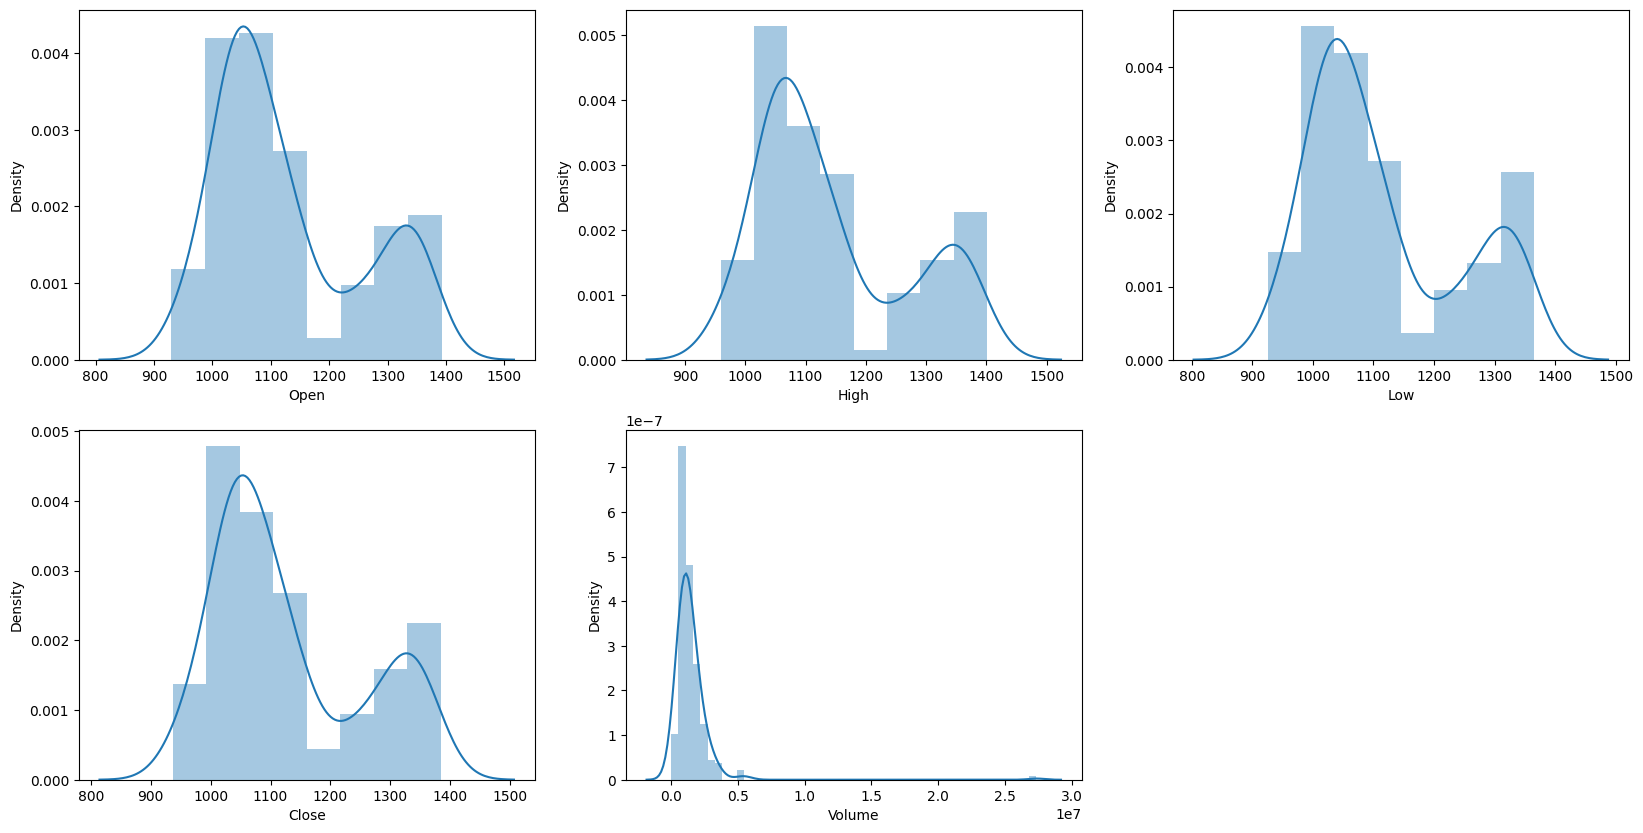

In [27]:
 features = ['Open', 'High', 'Low', 'Close', 'Volume'] 
  
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.distplot(df[col]) 
plt.show()
 

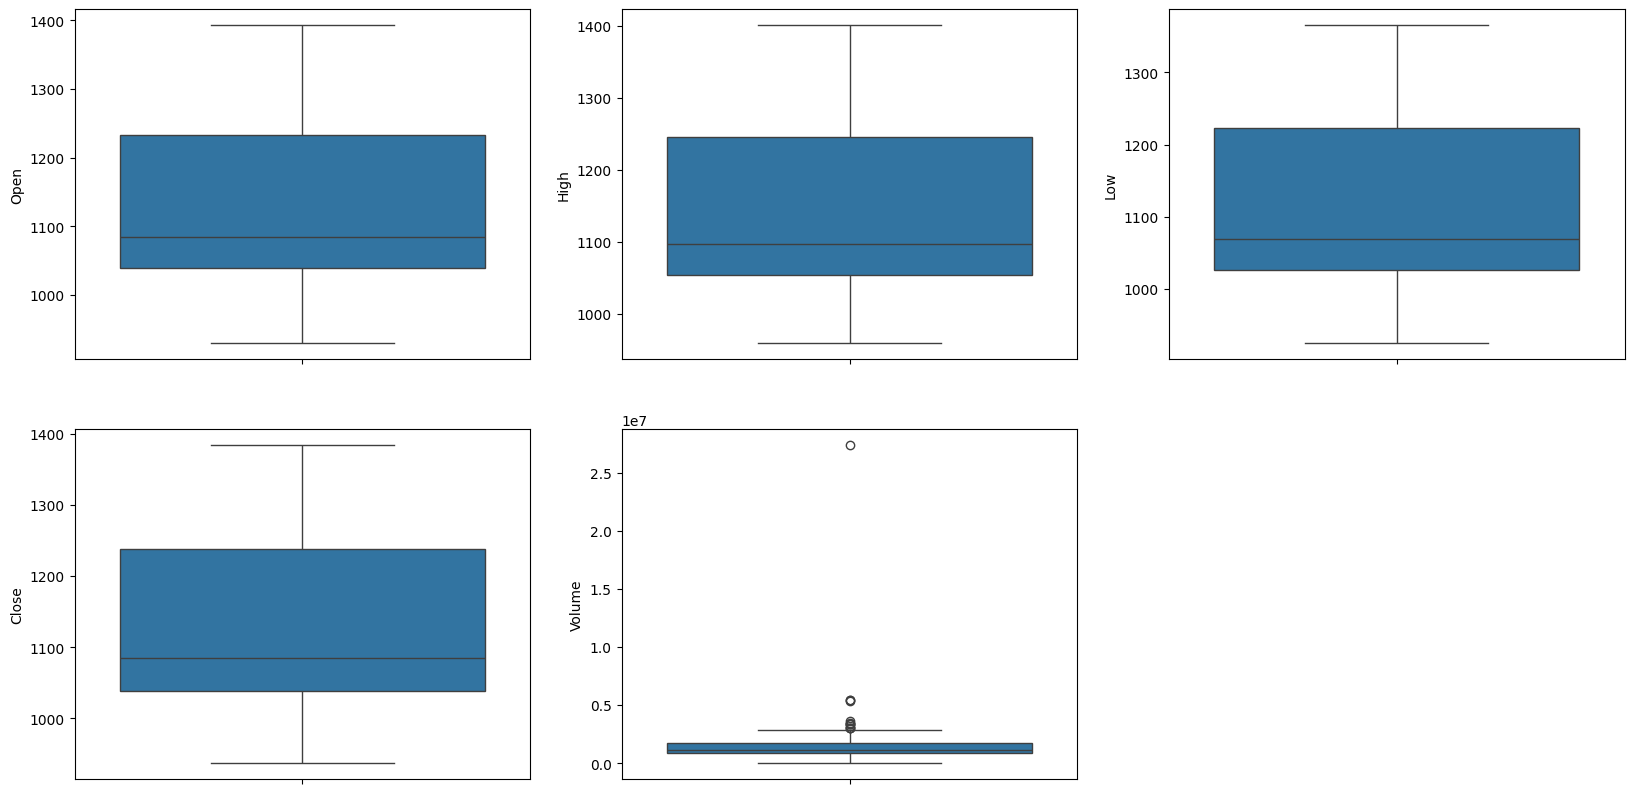

In [28]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
  plt.subplot(2,3,i+1) 
  sb.boxplot(df[col]) 
plt.show()

Feature Engineering

In [33]:
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[1].astype('int') 
df['month'] = splitted[0].astype('int') 
df['year'] = splitted[2].astype('int')
df.head()
  


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2022-08-10,959.950012,969.000000,950.099976,966.599976,961.854065,1247420,8,2022,10
1,2022-08-11,971.000000,974.900024,955.099976,958.250000,953.545044,1035579,8,2022,11
2,2022-08-12,960.000000,964.500000,950.950012,952.549988,947.873047,653263,8,2022,12
3,2022-08-16,958.000000,981.700012,949.549988,979.099976,974.292664,965828,8,2022,16
4,2022-08-17,981.000000,986.000000,968.250000,970.549988,965.784668,1182141,8,2022,17


In [35]:

df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2022-08-10,959.950012,969.000000,950.099976,966.599976,961.854065,1247420,8,2022,10,1
1,2022-08-11,971.000000,974.900024,955.099976,958.250000,953.545044,1035579,8,2022,11,1
2,2022-08-12,960.000000,964.500000,950.950012,952.549988,947.873047,653263,8,2022,12,1
3,2022-08-16,958.000000,981.700012,949.549988,979.099976,974.292664,965828,8,2022,16,1
4,2022-08-17,981.000000,986.000000,968.250000,970.549988,965.784668,1182141,8,2022,17,1


In [41]:
df['open-close']  = df['Open'] - df['Close'] 
df['low-high']  = df['Low'] - df['High'] 
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

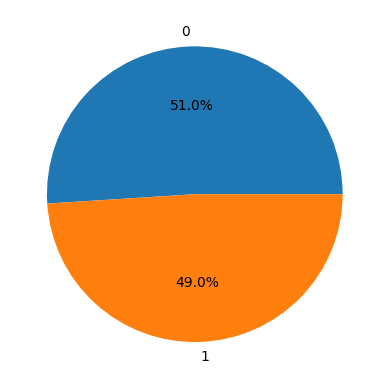

In [42]:
plt.pie(df['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

Data splitting and Normalisation

In [47]:
features = df[['open-close', 'low-high', 'is_quarter_end']] 
target = df['target'] 
  
scaler = StandardScaler() 
features = scaler.fit_transform(features) 
  
X_train, X_valid, Y_train, Y_valid = train_test_split( 
    features, target, test_size=0.1, random_state=2022) 
print(X_train.shape, X_valid.shape)

(222, 3) (25, 3)


Model development and evaluation


In [48]:
models = [LogisticRegression(), SVC( 
  kernel='poly', probability=True), XGBClassifier()] 
  
for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5362248213125406
Validation Accuracy :  0.6666666666666667

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4130929174788824
Validation Accuracy :  0.6538461538461539

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 